In [10]:
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"
CONFIG_PATH = f"{PROJECT_PATH}/config_ant.yaml"

In [9]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(PROJECT_PATH)
from utils.data import Dataset
import utils.figure as ufigure

In [11]:
Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

  0%|          | 0/141 [00:00<?, ?it/s]

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...
Finished loading INFO


100%|██████████| 141/141 [00:08<00:00, 15.67it/s]


In [12]:
INFO = Data.info
INFO_values = Data.info_values
config = Data.config

In [17]:
folders = []

for folder in INFO_values:
    folders.append(folder['directory'])

In [31]:
cluster_data = {}

for folder in folders:
    cluster_data[f"{folder.split('/')[2]}"] = np.load(f"{PROJECT_PATH}/{folder}/cluster.npy")
    

In [32]:
cluster_data

{'07Odmajfd_antmovie200927210043': array([0., 0., 0., ..., 0., 0., 0.]),
 '09GWmajfd_antmovie201010223407': array([0., 0., 0., ..., 0., 0., 0.]),
 '04Ydmidfd_antmovie200924205857': array([ 0.,  0.,  0., ..., -2., -2., -2.]),
 '04WTmidfr_antmovie201010202045': array([ 0.,  0.,  0., ..., -2., -2., -2.]),
 '05BOmajfd_antmovie200929205417': array([ 0.,  0.,  0., ..., -2., -2., -2.]),
 '10BYmidfd_antmovie200928222534': array([-2., -2., -2., ..., -2., -2., -2.]),
 '04Tdminfr_antmovie200927202259': array([-2., -2., -2., ...,  0.,  0.,  0.]),
 '08WWmidfd_antmovie200926222746': array([-2., -2., -2., ..., -2., -2., -2.]),
 '08dOminfr_antmovie200927210505': array([-2., -2., -2., ..., -2., -2., -2.]),
 '01Bdmidfr_antmovie200926195414': array([-2., -2., -2., ...,  0.,  0.,  0.]),
 '02dPmajfd_antmovie200927200230': array([0., 0., 0., ..., 0., 0., 0.]),
 '06dYmajfr_antmovie200924213405': array([ 0.,  0.,  0., ..., -2., -2., -2.]),
 '01Pdminfr_antmovie200927192312': array([-2., -2., -2., ..., -2., -2.

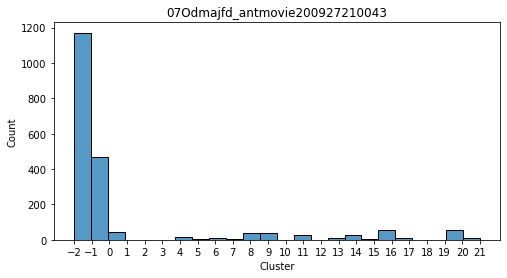

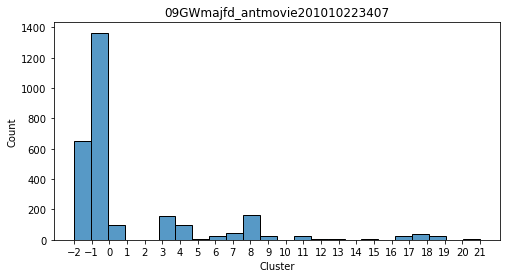

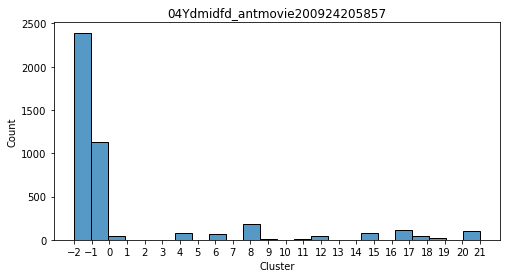

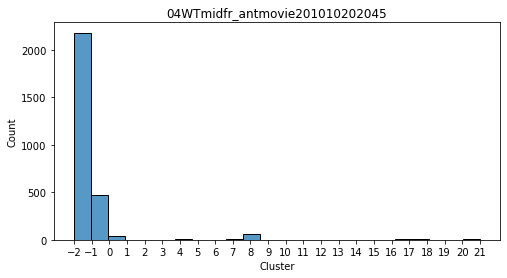

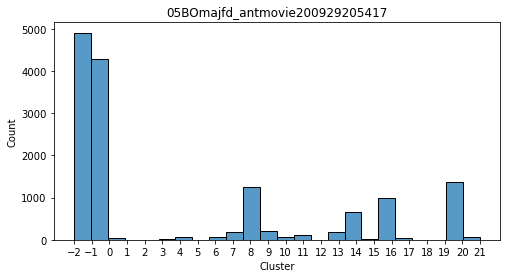

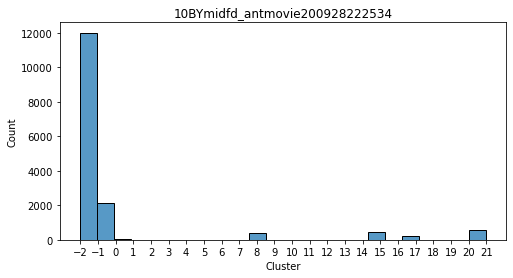

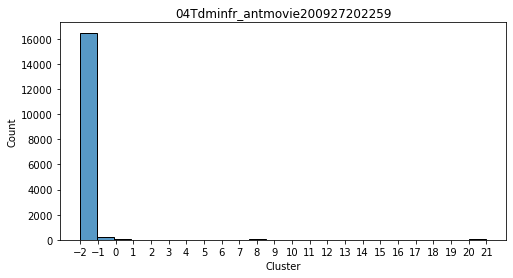

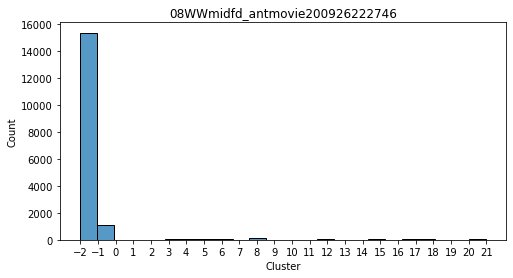

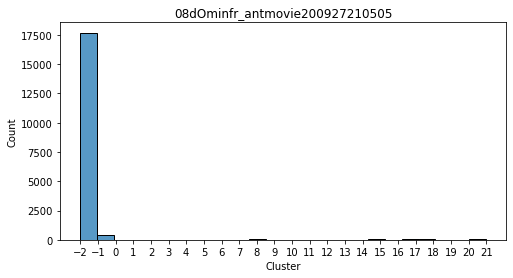

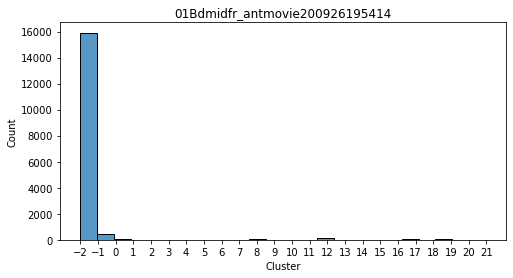

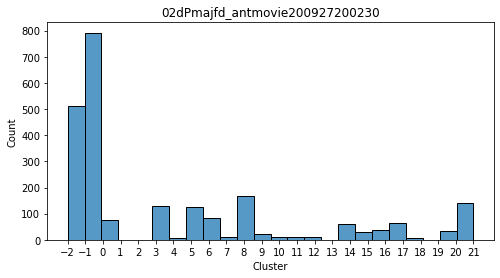

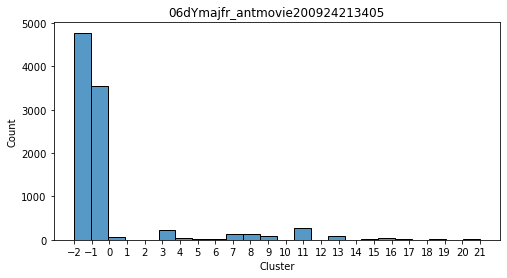

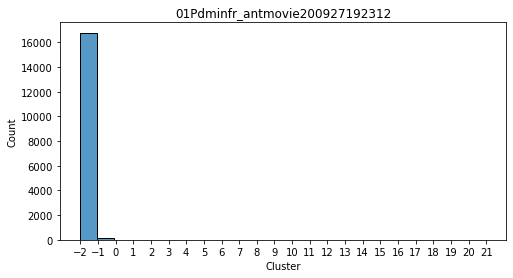

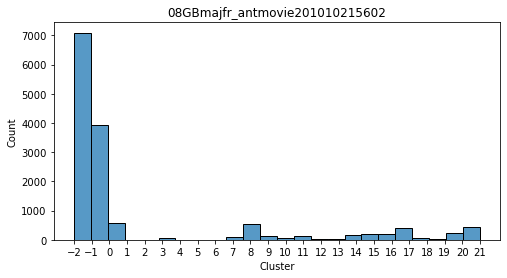

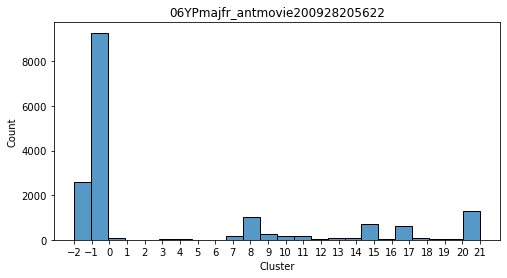

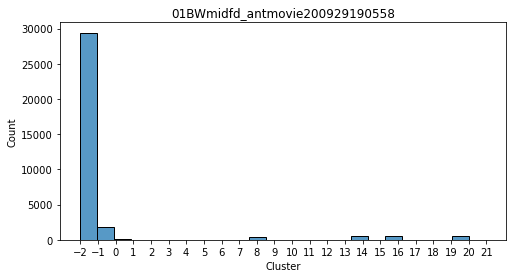

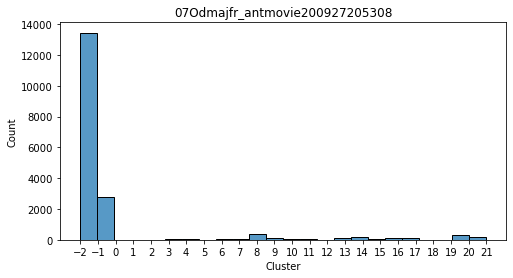

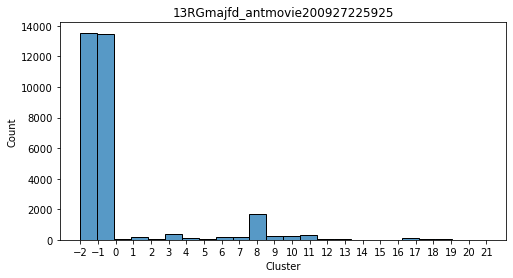

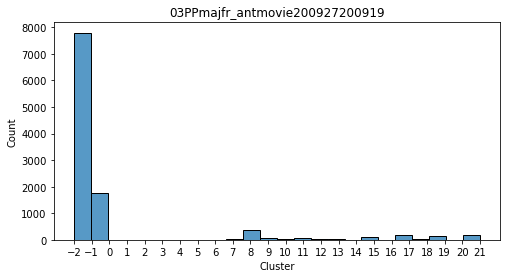

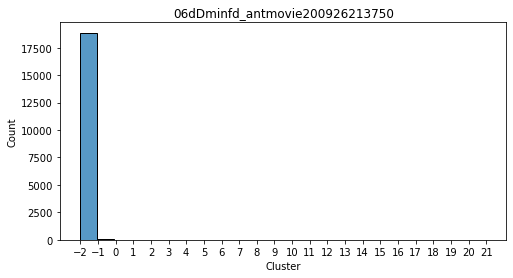

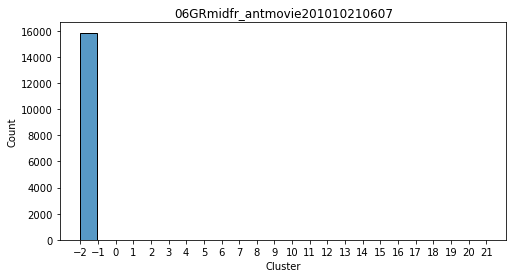

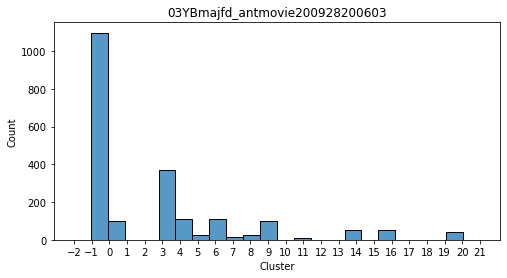

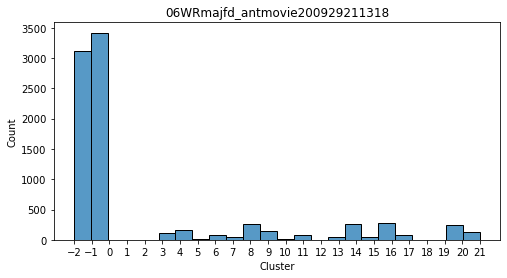

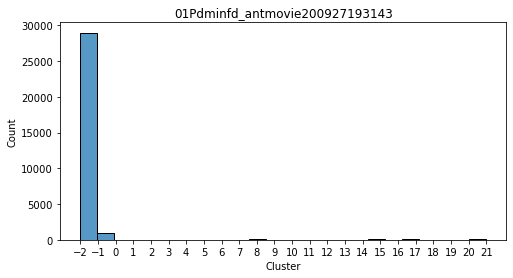

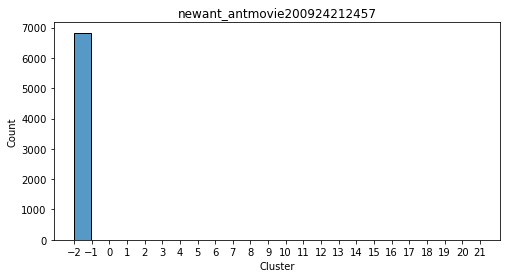

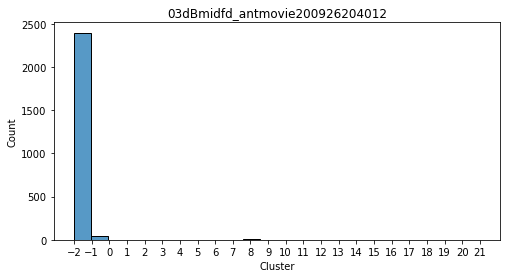

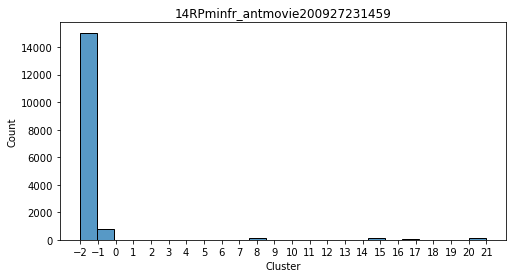

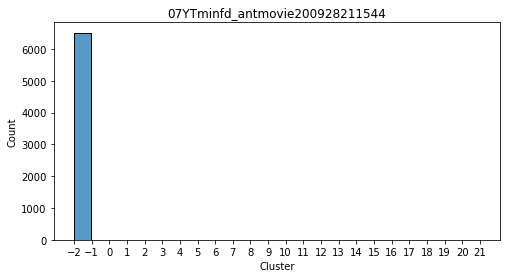

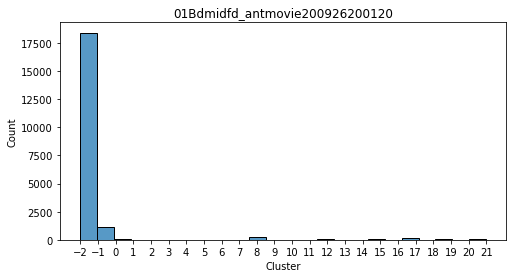

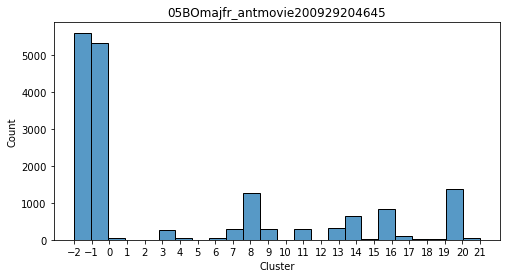

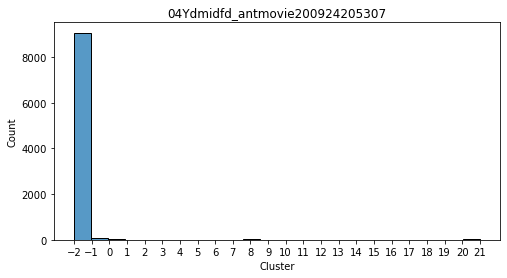

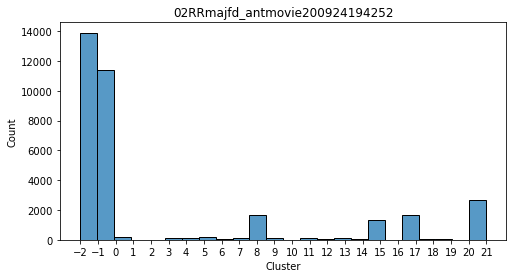

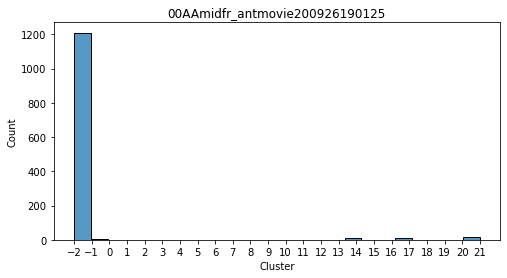

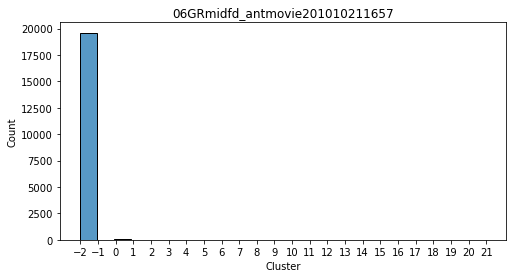

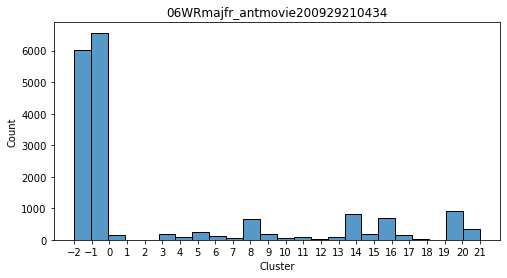

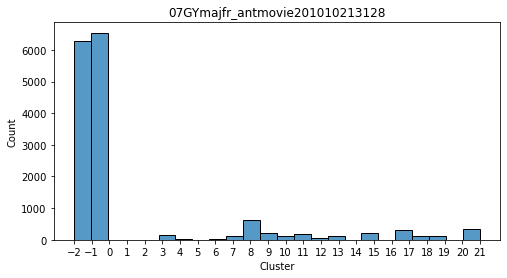

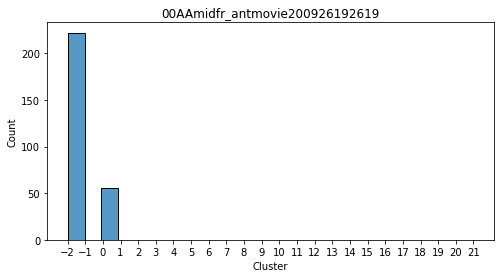

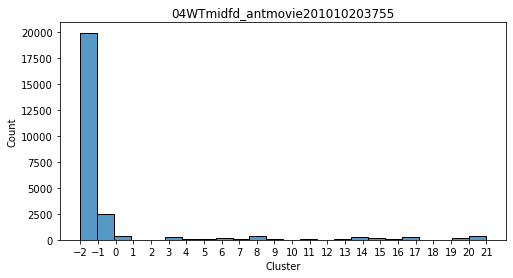

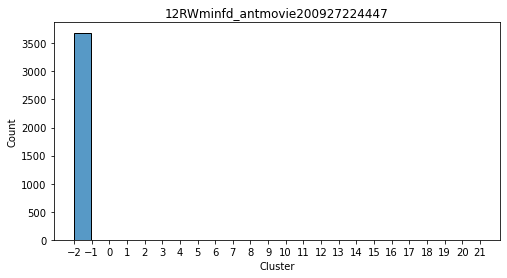

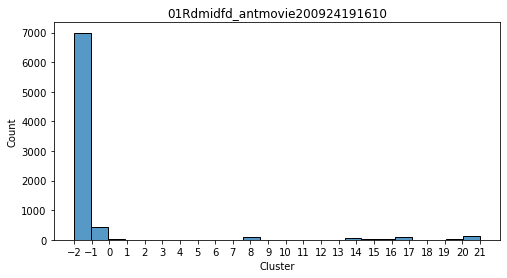

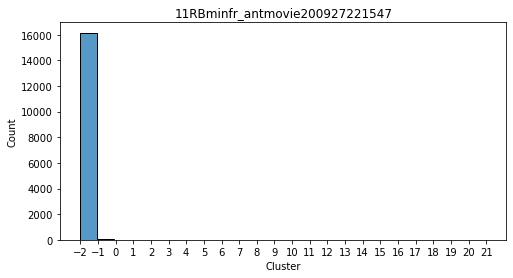

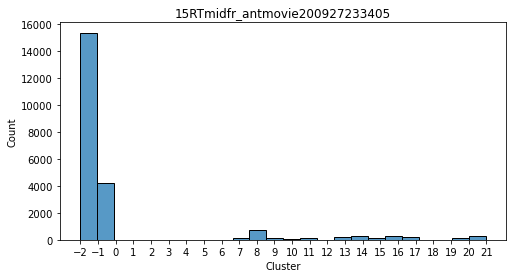

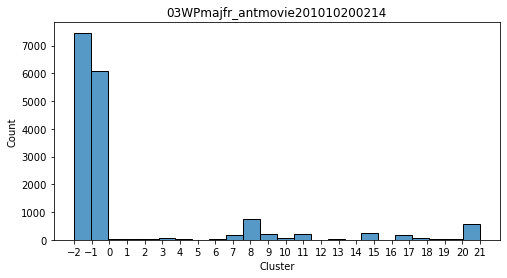

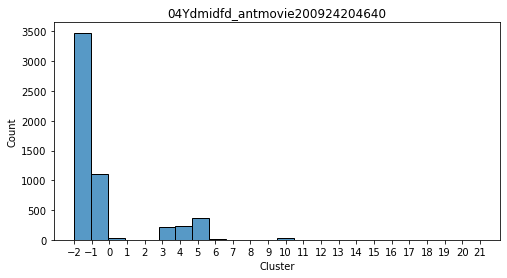

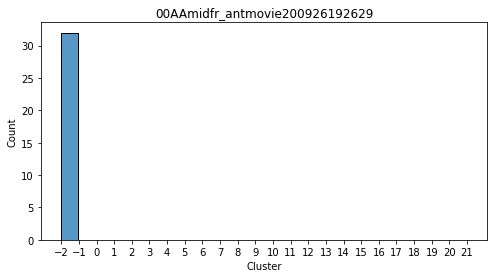

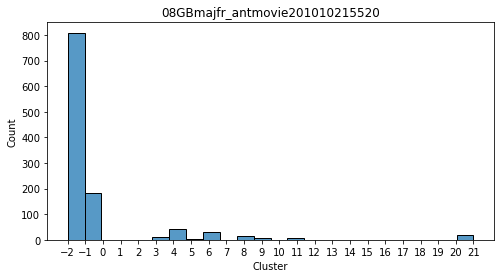

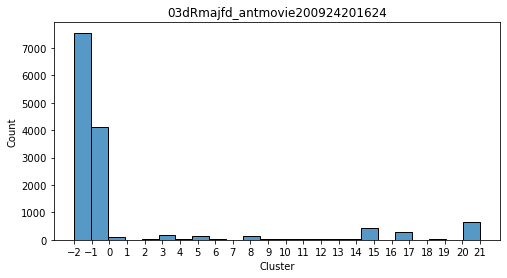

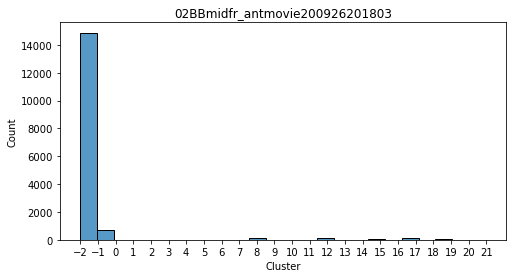

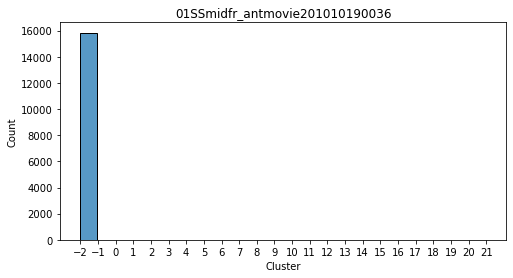

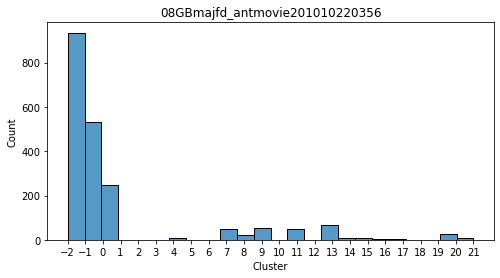

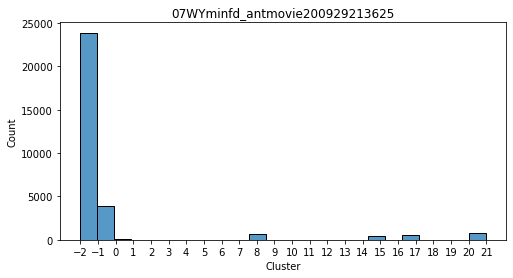

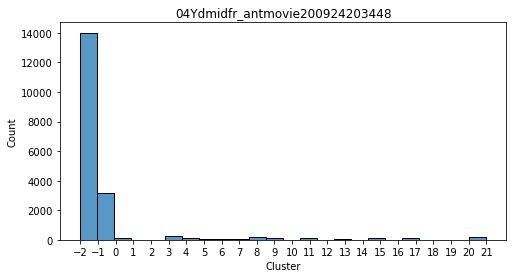

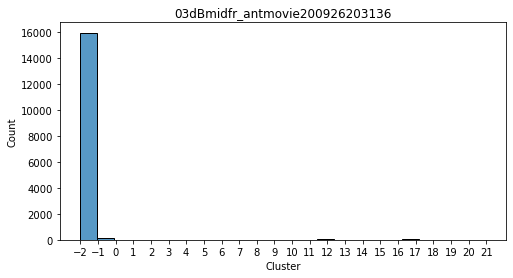

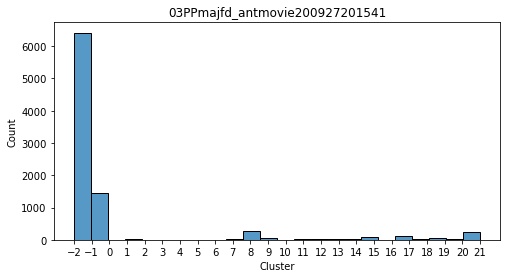

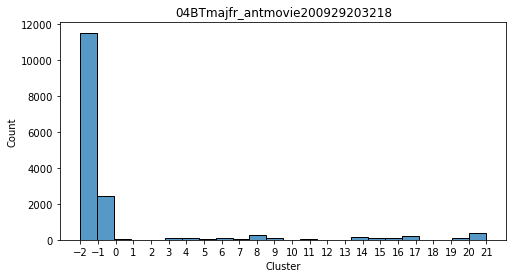

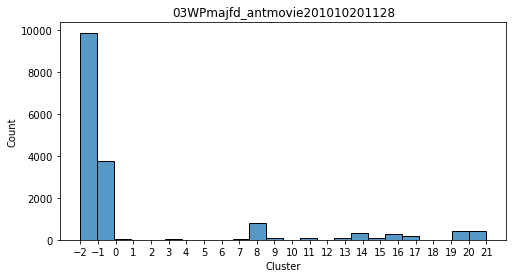

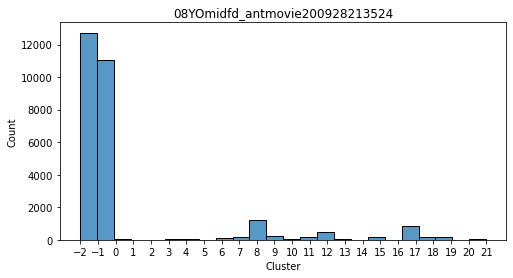

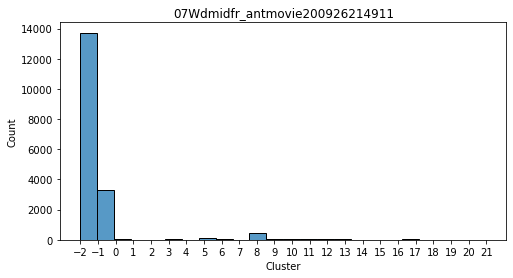

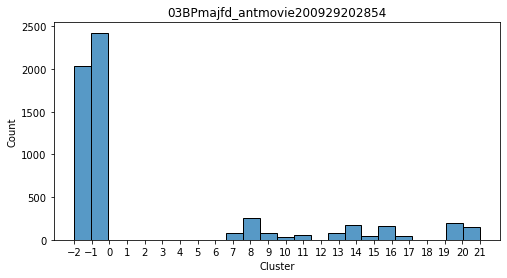

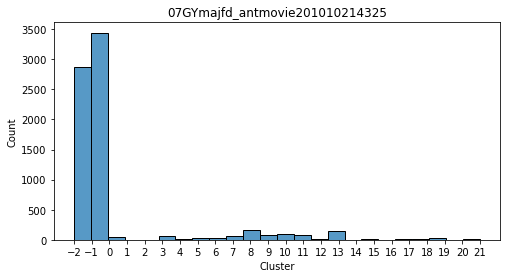

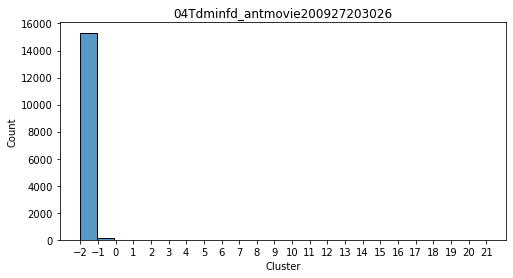

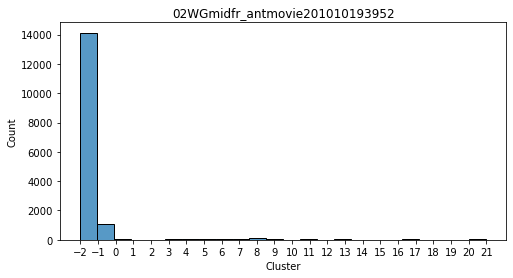

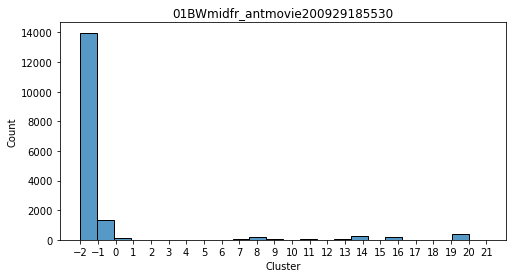

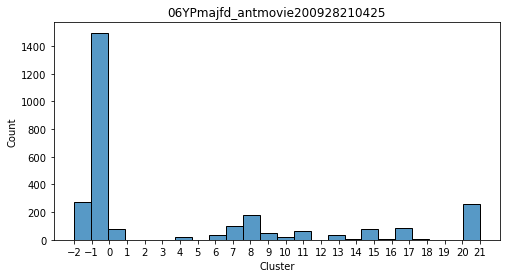

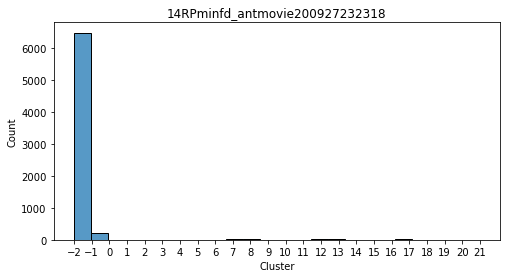

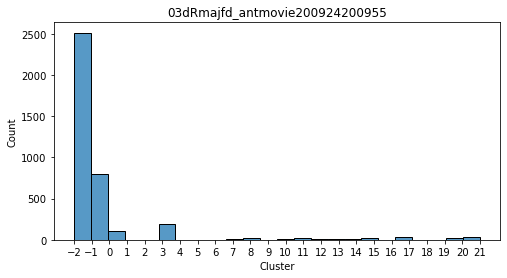

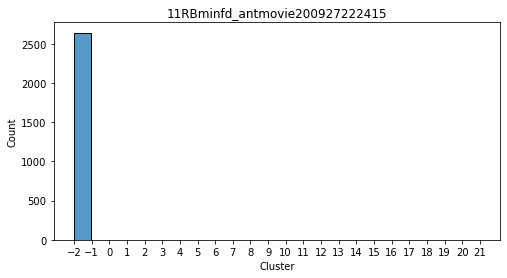

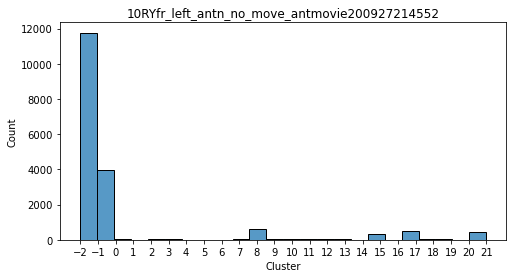

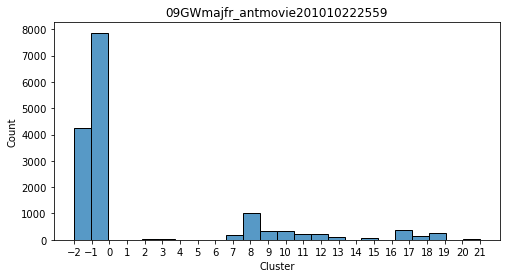

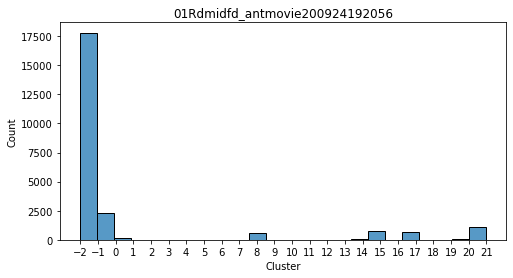

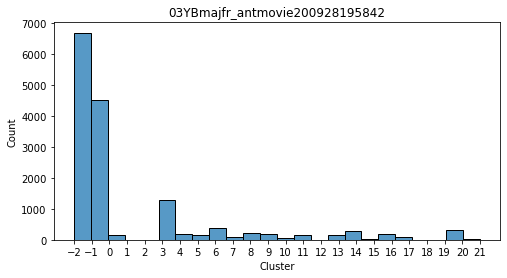

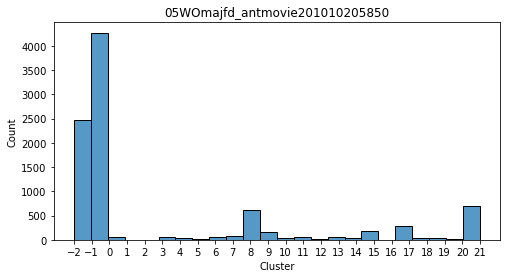

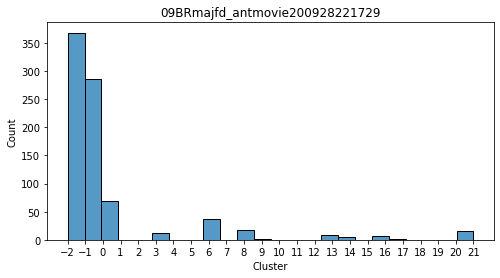

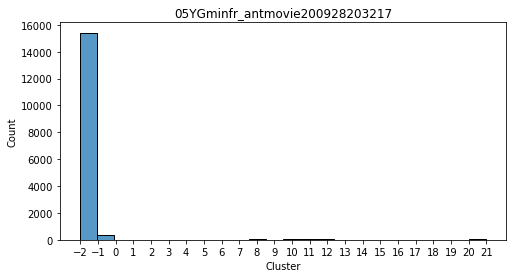

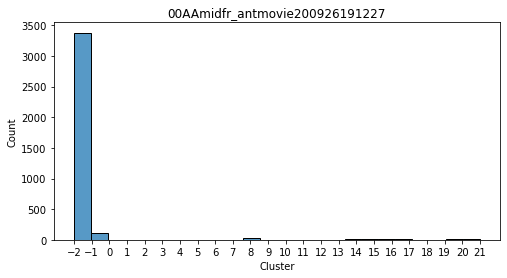

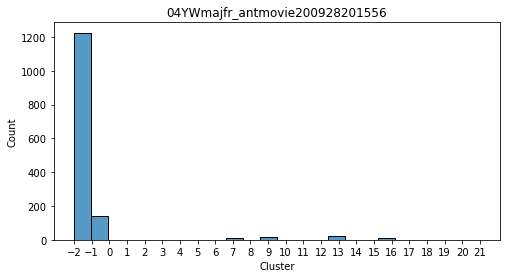

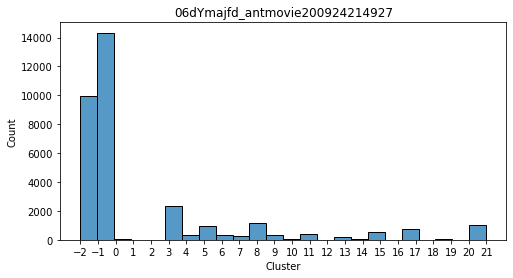

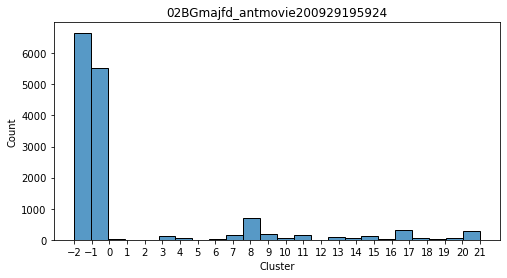

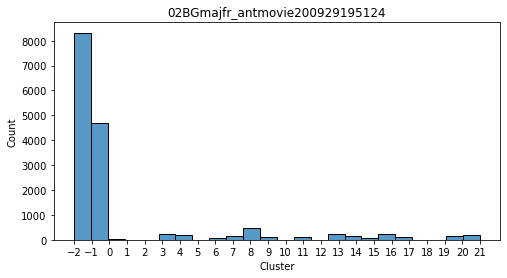

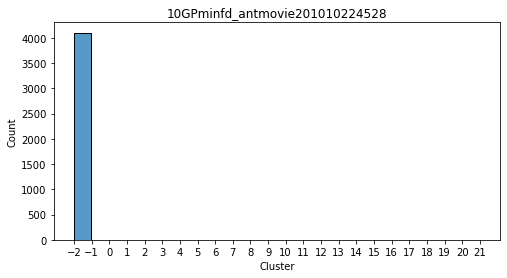

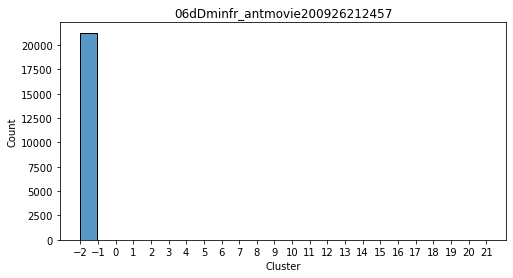

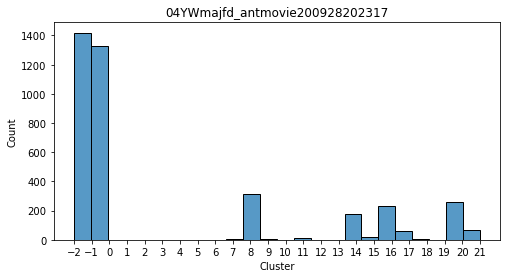

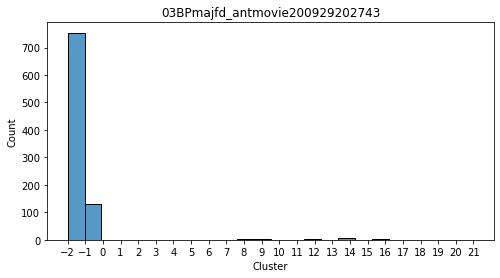

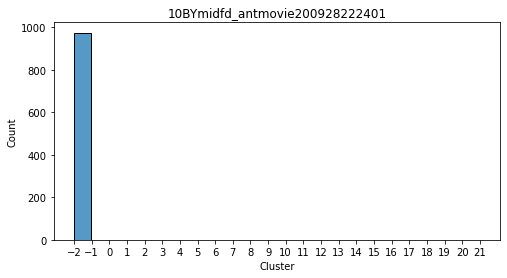

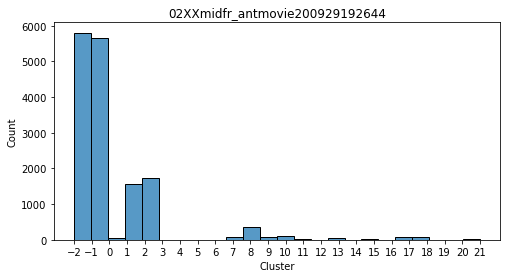

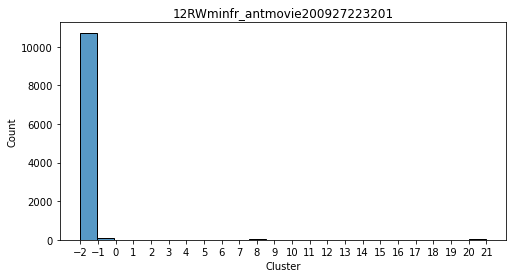

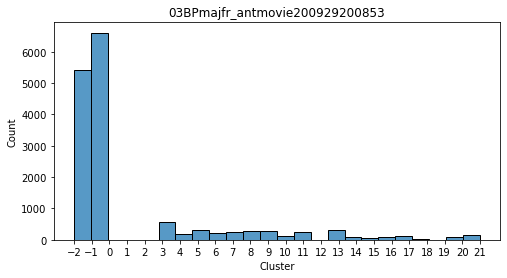

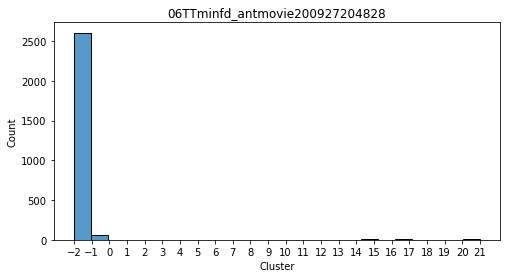

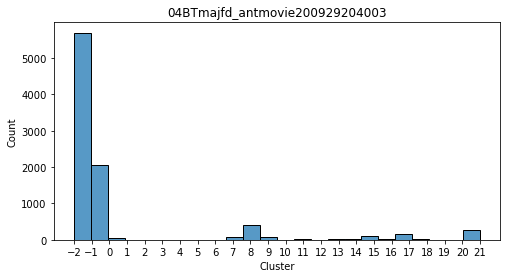

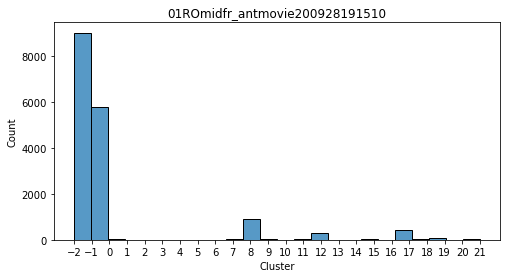

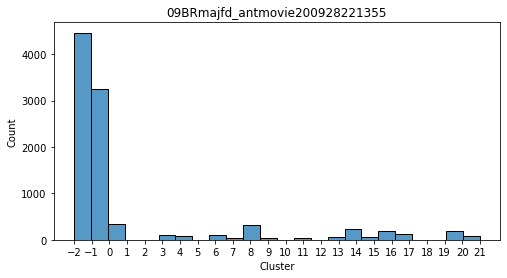

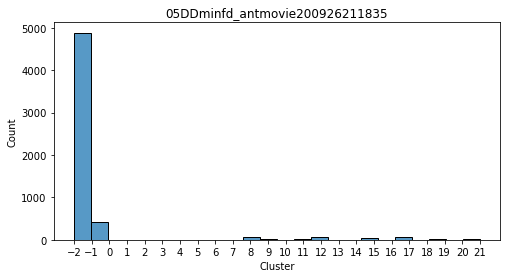

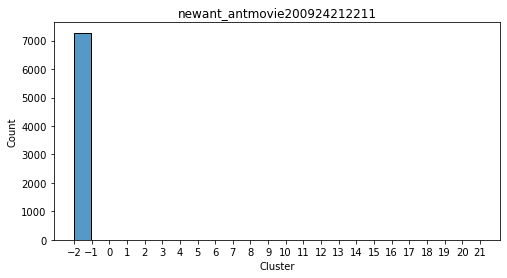

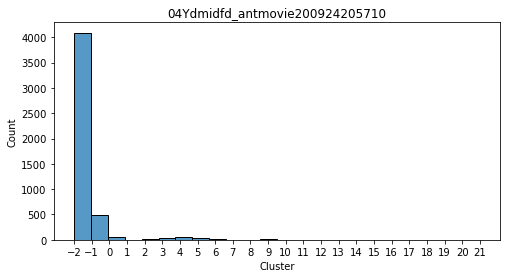

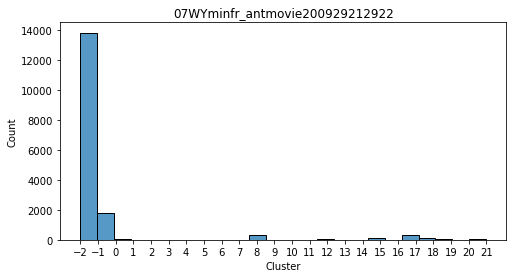

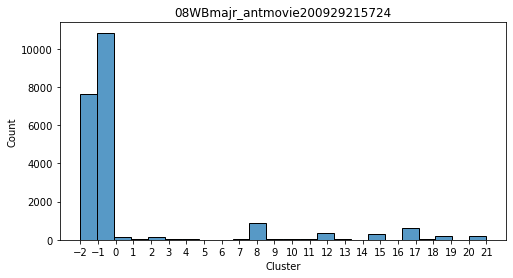

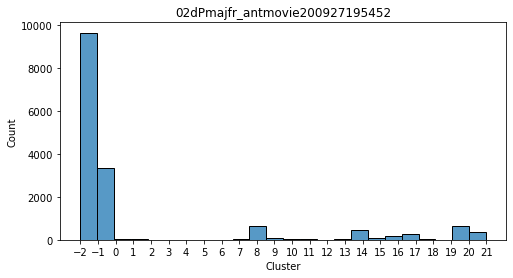

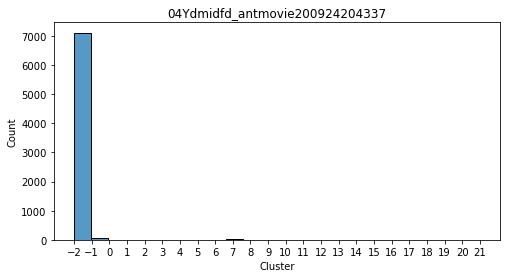

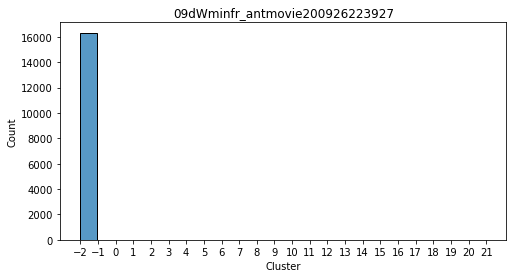

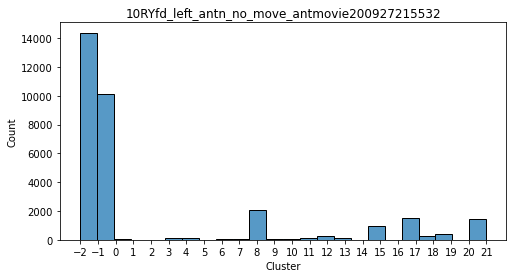

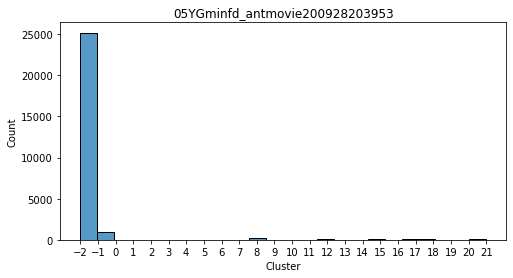

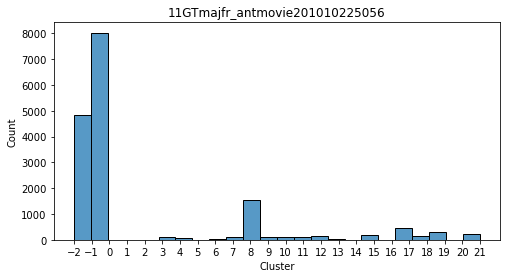

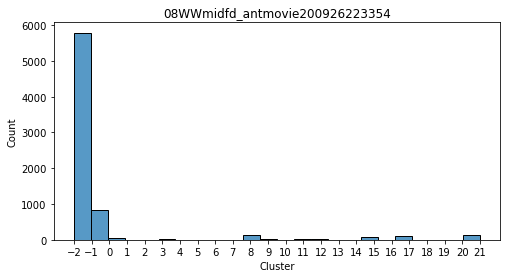

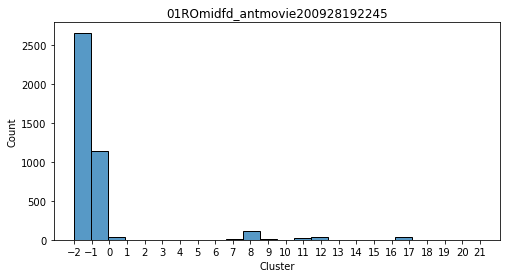

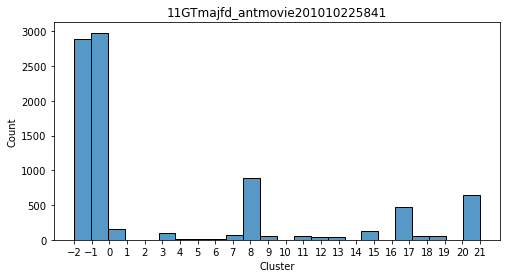

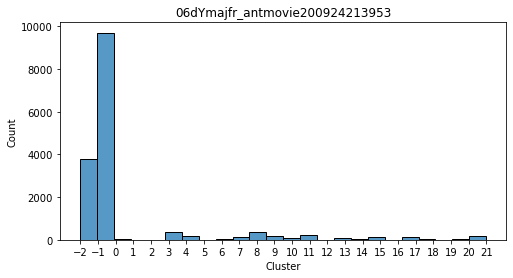

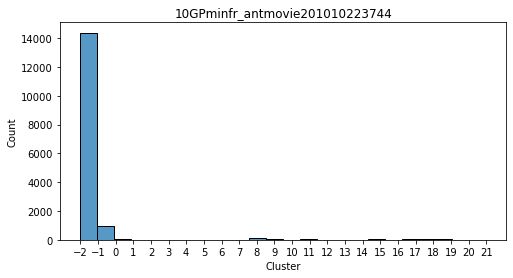

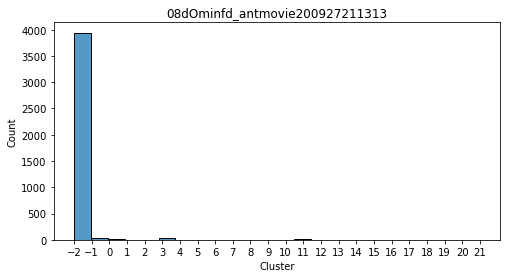

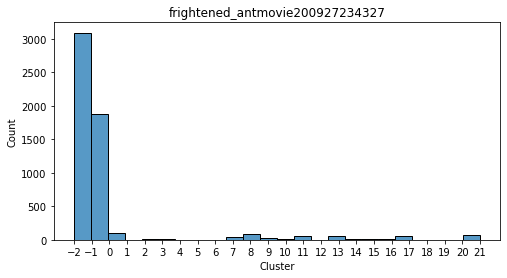

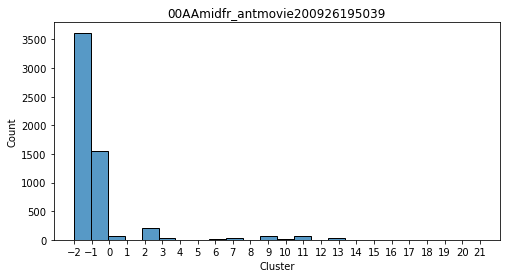

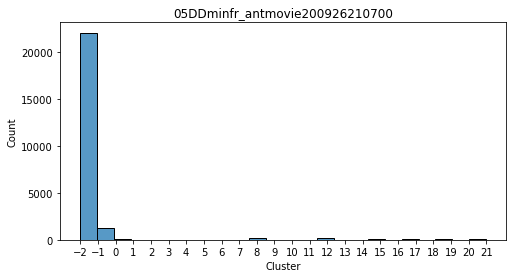

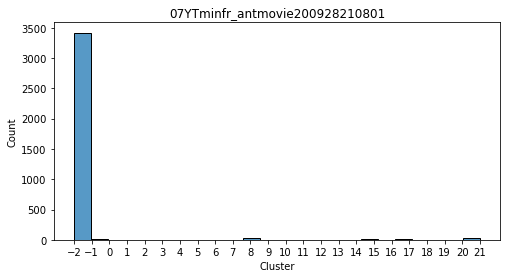

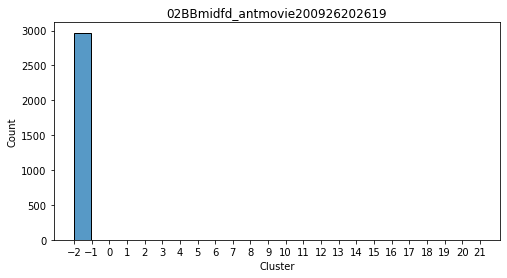

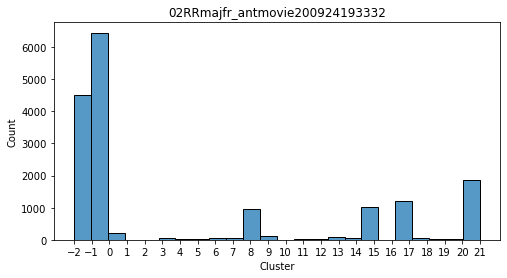

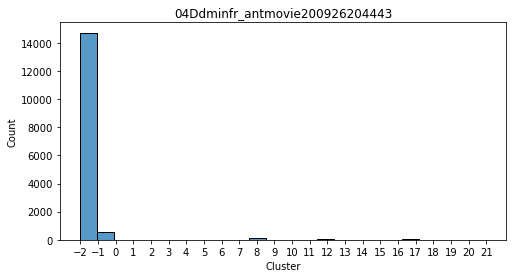

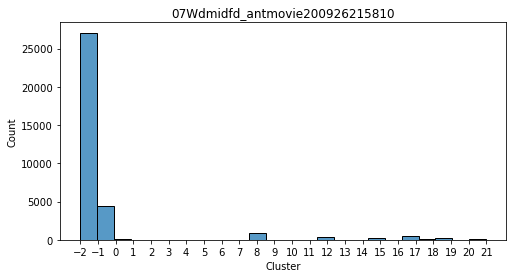

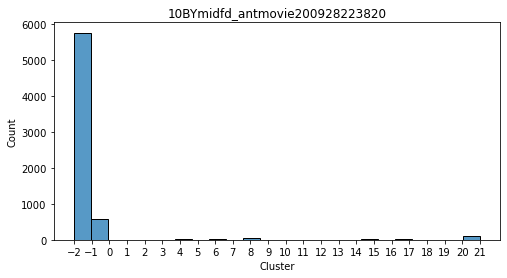

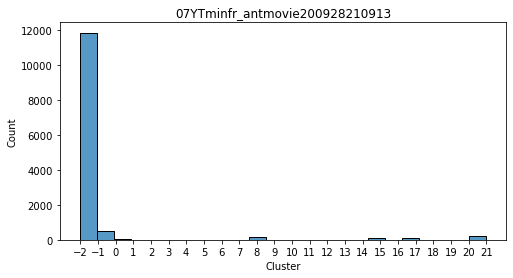

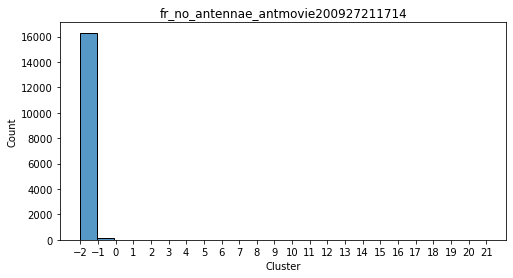

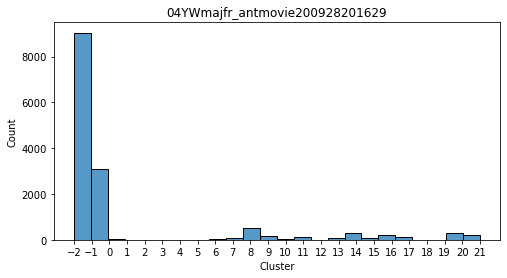

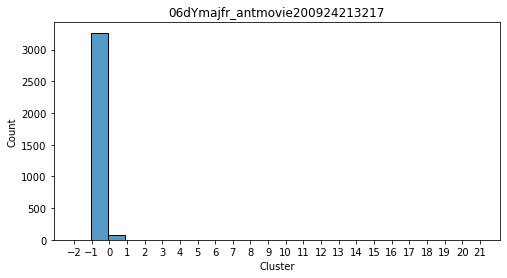

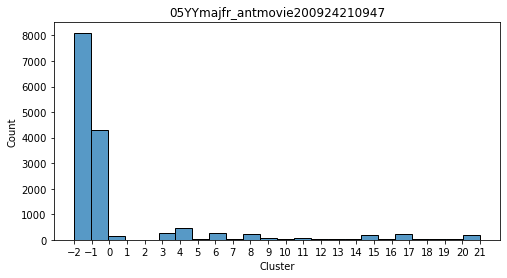

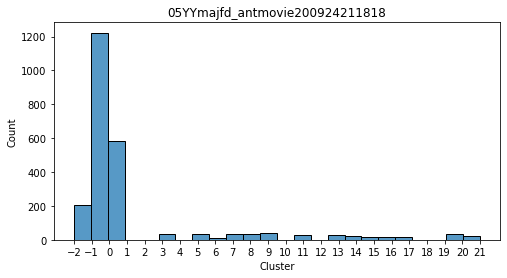

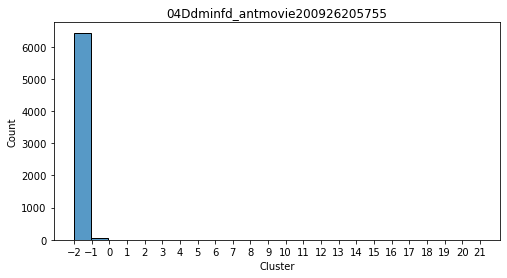

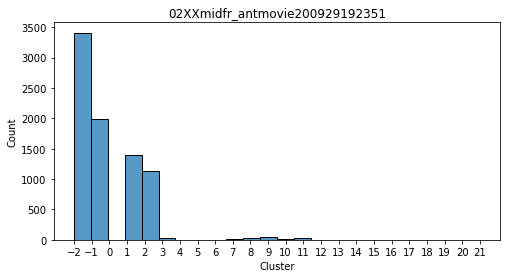

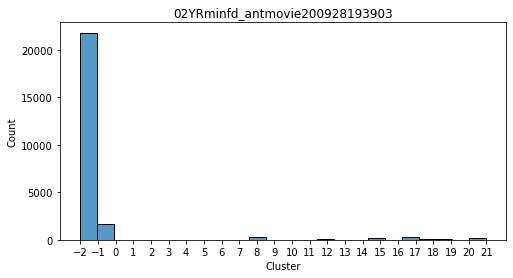

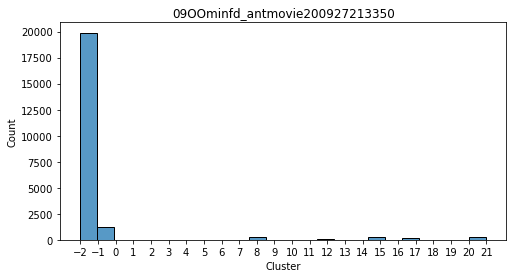

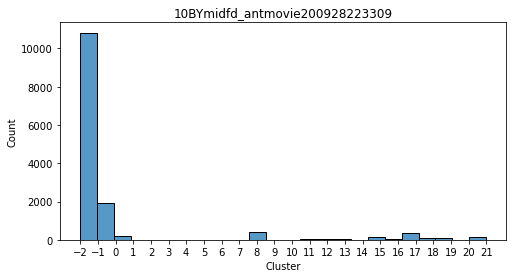

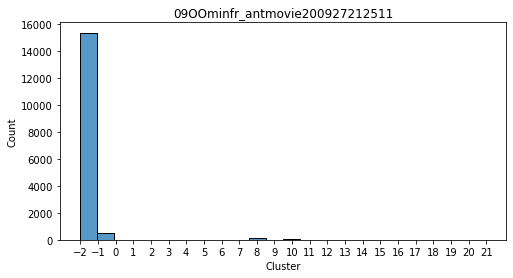

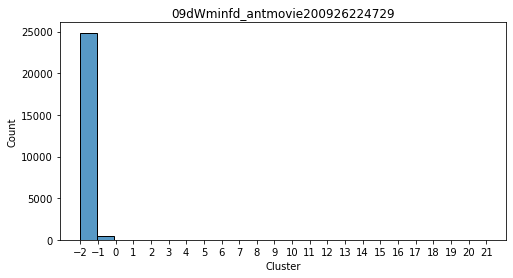

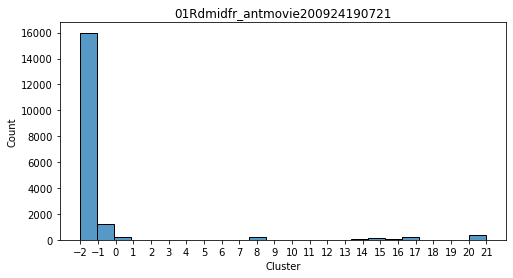

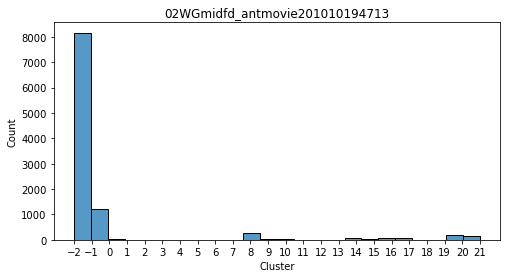

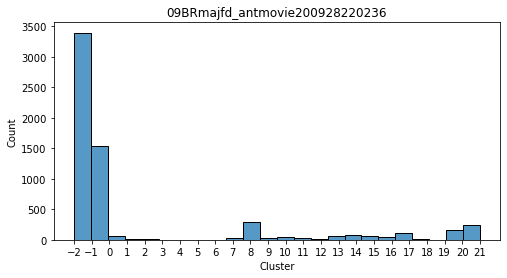

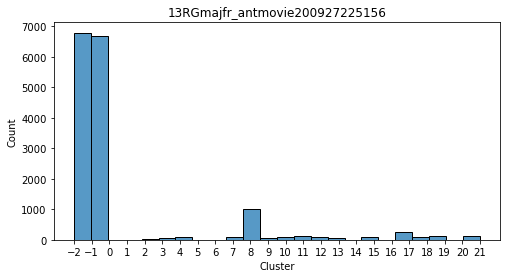

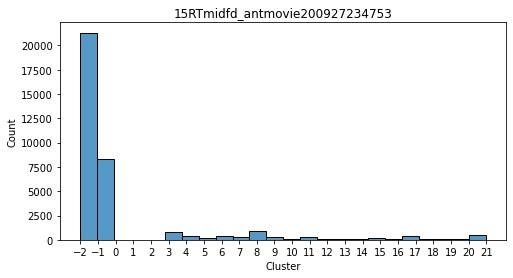

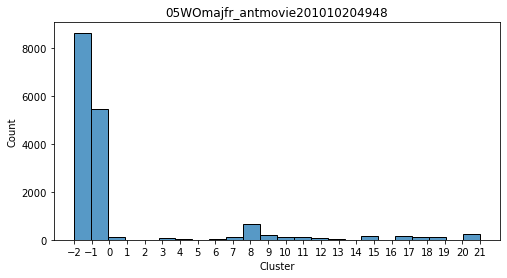

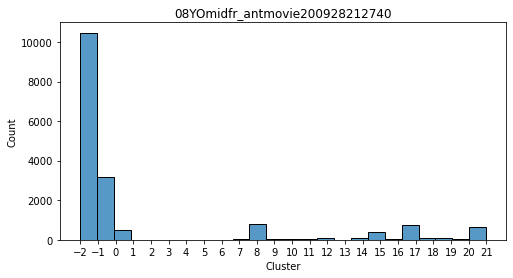

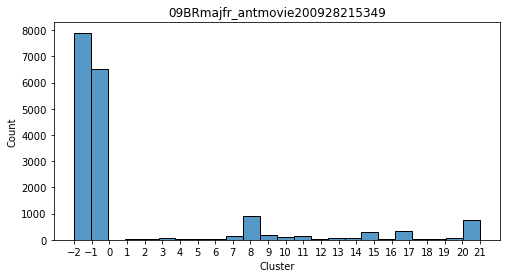

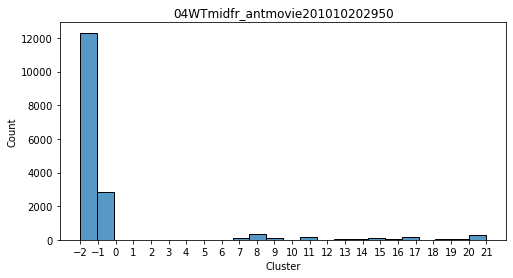

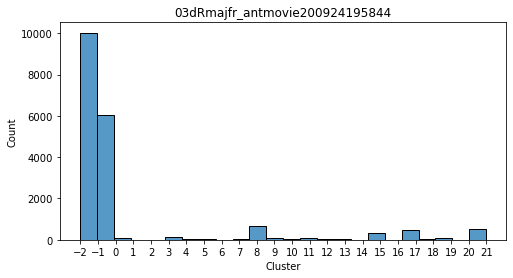

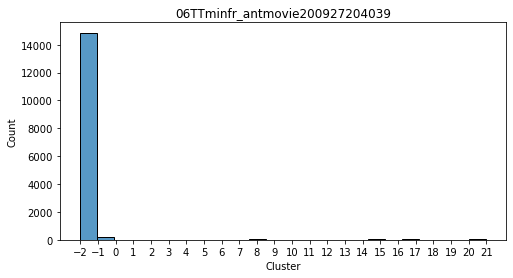

In [61]:
for key, value in cluster_data.items():
    plot_cluster_distribution(value)

In [59]:
def plot_cluster_distribution(data):
    fig,ax = plt.subplots(figsize=(8,4))

    sns.histplot(data, binrange=(-2,21), bins=24)
    
    plt.title(key)
    plt.xlabel("Cluster")
    plt.xticks(range(-2,22))

    plt.show()

In [54]:
all_cluster_data = np.empty(0)

for key,value in cluster_data.items():
    all_cluster_data = np.concatenate([all_cluster_data, value])
    
print(len(all_cluster_data))

1872138


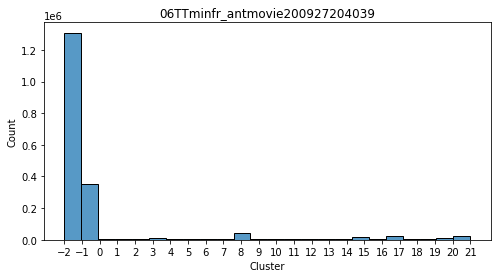

In [60]:
plot_cluster_distribution(all_cluster_data)

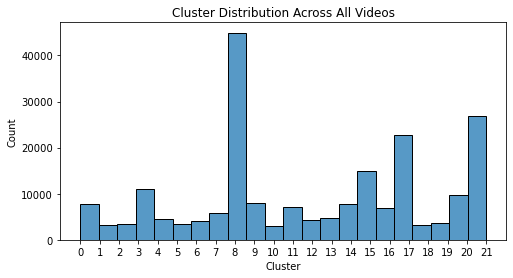

In [63]:
fig,ax = plt.subplots(figsize=(8,4))

sns.histplot(all_cluster_data, binrange=(0,21), bins=22)
    
plt.title("Cluster Distribution Across All Videos")
plt.xlabel("Cluster")
plt.xticks(range(0,22))

plt.show()